# Klassificering av datapunkter med olika linjer

I denna rapport undersöker vi hur datapunkterna från `unlabelled_data.csv` klassificeras med hjälp av olika linjer. Vi börjar med vår egen linje som delar punkterna så jämnt som möjlight och jämför sedan med tre givna funktioner: 

- f(x) = −0.489x  
- g(x) = −2x + 0.16  
- h(x) = 800x − 120  

Syftet är att se om klassificeringen av punkterna skiljer sig mellan linjerna.

## Visualisering av datapunkterna med alla linjer

Vi börjar med att plotta punkterna tillsammans med vår egen linje samt de tre nya funktionerna. Detta gör det lättare att visuellt se vilka punkter som klassificeras olika beroende på linje.




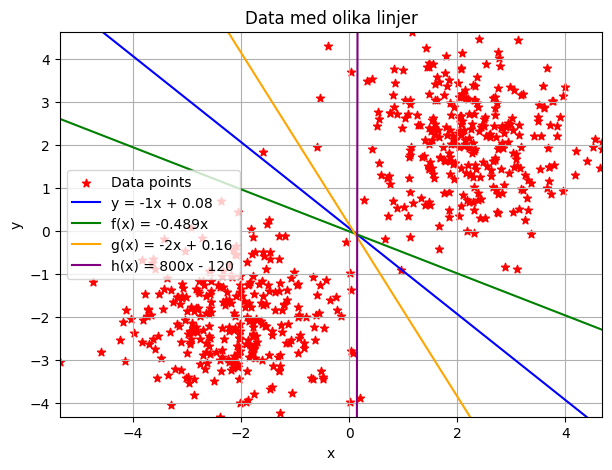

In [5]:
"""
VG uppgift:
i) Visa datan i en graf tillsammans med följande linjer utöver den vi själve hittat:

"""

import numpy as np
import matplotlib.pyplot as plt
import line_class as ln
import main as ma

# Hämta data och egen linje
x_point, y_point = ln.get_data(ln.path)  
x_values, y_values, labels = ma.classify_points_and_get_labels()
k, m = ma.k, ma.m  # linje från main.py

# Skapa x-intervallet för linjerna
x_line = np.linspace(min(x_point), max(x_point), 200)
# egen linje som delar punkterna så jämnt som möjlight
y_line = k * x_line + m

# VG-linjer
y_line1 = -0.489 * x_line      # f(x)
y_line2 = -2 * x_line + 0.16   # g(x)
y_line3 = 800 * x_line - 120   # h(x)

# === Plot ===
plt.figure(figsize=(7,5))
plt.scatter(x_point, y_point, label="Data points", color="red", marker="*")
plt.plot(x_line, y_line, label=f"y = {k}x + {m:.2f}", color="blue")
plt.plot(x_line, y_line1, label="f(x) = -0.489x", color="green")
plt.plot(x_line, y_line2, label="g(x) = -2x + 0.16", color="orange")
plt.plot(x_line, y_line3, label="h(x) = 800x - 120", color="purple")
plt.title("Data med olika linjer")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.xlim(min(x_values), max(x_values))
plt.ylim(min(y_values), max(y_values))
plt.margins(x=0.1, y=0.1)
plt.show()


## Klassificering av punkter

Nu klassificerar vi varje punkt med hjälp av `point_position` för alla fyra linjer. Vi jämför resultatet för att identifiera eventuella skillnader.


In [ ]:
"""iii) Använda dessa nya funktioner
 för att klassifiera datan
"""
import numpy as np
import main as ma

# Hämta data
x_values, y_values, my_label= ma.classify_points_and_get_labels()

# Skapa x-intervallet för linjerna
x_line = np.linspace(min(x_values), max(x_values), 200)

# ===== f(x) =====
k_f, m_f = -0.489, 0
labels_f = np.array([ma.point_position(x, y, k_f, m_f) for x, y in zip(x_values, y_values)])
y_line1 = k_f * x_line + m_f
ma.draw_classified(x_line, y_line1, k_f, m_f, x_values, y_values, labels_f)

# ===== g(x) =====
k_g, m_g = -2, 0.16
labels_g = np.array([ma.point_position(x, y, k_g, m_g) for x, y in zip(x_values, y_values)])
y_line2 = k_g * x_line + m_g
ma.draw_classified(x_line, y_line2, k_g, m_g, x_values, y_values, labels_g)

# ===== h(x)=====
k_h, m_h = 800, -120
labels_h = np.array([ma.point_position(x, y, k_h, m_h) for x, y in zip(x_values, y_values)])
y_line3= k_h * x_line + m_h
ma.draw_classified(x_line, y_line3, k_h, m_h, x_values, y_values, labels_h)





'iii) Använda dessa nya funktioner\n för att klassifiera datan\n'

## Reflektion

Från utskriften och grafen kan vi observera att vissa punkter klassificeras olika beroende på vilken linje vi använder.  

- Vår egen linje delar punkterna relativt jämnt.  
- f(x) = −0.489x och g(x) = −2x + 0.16 ger olika gränsdragningar, vilket påverkar vilka punkter som hamnar ovanför respektive under linjen.  
- h(x) = 800x − 120 är extrem och de flesta punkter hamnar under linjen.  

Detta visar tydligt hur valet av linje påverkar klassificeringen av datapunkterna.
